# Metrocar Mastery Project — Growth & Funnel Analytics
#  ---------------------------------------------------------------
A data-driven analysis of Metrocar's user acquisition funnel and retention.Using SQL-style data exploration and Python visualization, we identify
bottlenecks and retention patterns to optimize conversion and growth.



# 1. Setup & Libraries

In [100]:
!pip install pandas matplotlib seaborn plotly --quiet


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

# 2. Load or Simulate Data

In [101]:
#For GitHub / Colab version: used simulated data
#Replace this with real SQL query results in private environment

funnel_data = pd.DataFrame({
    "step": ["Landing Page", "Signup", "First Ride Request", "Completed Ride"],
    "users": [10000, 4200, 2300, 1800]
})

cohort_data = pd.DataFrame({
    "Cohort": ["2023-01", "2023-02", "2023-03", "2023-04", "2023-05"],
    "Week1": [1.0, 1.0, 1.0, 1.0, 1.0],
    "Week2": [0.62, 0.57, 0.59, 0.63, 0.61],
    "Week3": [0.48, 0.44, 0.46, 0.49, 0.47],
    "Week4": [0.36, 0.33, 0.31, 0.38, 0.35]
})
funnel_data, cohort_data.head()


(                 step  users
 0        Landing Page  10000
 1              Signup   4200
 2  First Ride Request   2300
 3      Completed Ride   1800,
     Cohort  Week1  Week2  Week3  Week4
 0  2023-01    1.0   0.62   0.48   0.36
 1  2023-02    1.0   0.57   0.44   0.33
 2  2023-03    1.0   0.59   0.46   0.31
 3  2023-04    1.0   0.63   0.49   0.38
 4  2023-05    1.0   0.61   0.47   0.35)

# 3. Funnel Visualization

In [102]:
!pip install -q kaleido


In [105]:
#Calculate conversions and percentages
funnel_data["conversion"] = funnel_data["users"] / funnel_data["users"].iloc[0]
funnel_data["conversion_pct"] = (funnel_data["conversion"] * 100).round(1)

# Custom color palette: dark gray, blue, pink
custom_colors = ["#cccccc", "#092a47", "#d6e8fa", "#f16f9b"]

# Create funnel chart with Plotly
fig = px.funnel(
    funnel_data,
    x="users",
    y="step",
    title="User Acquisition Funnel",
    color="step",
    text=funnel_data["conversion_pct"].astype(str) + " %",
    color_discrete_sequence=custom_colors
)

#Adjust text position
fig.update_traces(textposition="inside")

#Display chart
fig.show()






# 4. Retention / Cohort Visualization

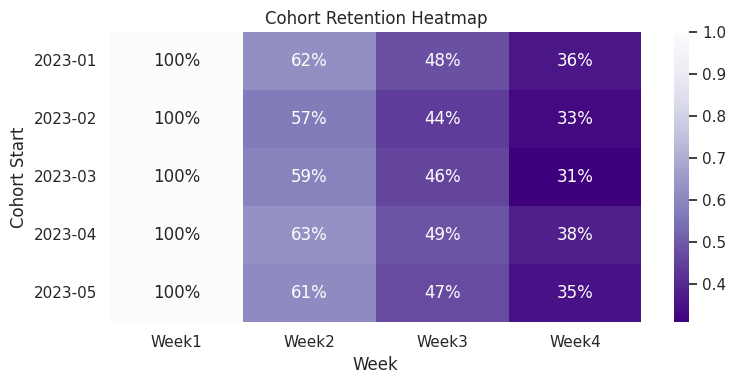

In [104]:
#Transform cohort data for heatmap
cohort_melt = cohort_data.melt(id_vars="Cohort", var_name="Week", value_name="Retention")

pivot = cohort_melt.pivot(index="Cohort", columns="Week", values="Retention")
plt.figure(figsize=(8,4))
sns.heatmap(pivot, annot=True, cmap="Purples_r", fmt=".0%")
plt.title("Cohort Retention Heatmap")
plt.ylabel("Cohort Start")
plt.xlabel("Week")
plt.tight_layout()
plt.savefig("retention_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()





### Key Insights

- **Signup conversion:** 42% of landing visitors sign up.
- **Ride completion:** 18% of all visitors complete a ride.
- **Retention:** After Week 3, only ~45% of users remain active.
- **Business takeaway:** Focus on activation (Signup → Ride Request) and early user engagement to boost retention.

### Next Steps
- A/B test signup and onboarding flow.
- Personalized reactivation campaigns after Week 2 drop-off.
- Integrate funnel KPIs into business dashboards.

